# Carregando base de dados

In [3]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import KFold, train_test_split, ParameterGrid

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

In [4]:
base_dados = pd.read_csv('../preprocessed_database.csv', low_memory=False)

In [5]:
base_dados

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,Age,Gender,AppliedAmount,Amount,Interest,...,PrincipalOverdueBySchedule,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Status
0,970,1150,5.0,0,4.0,53,1.0,2125.0,2125.0,20.97,...,1155.84,969.16,1187.91,1155.84,433.60,1.0,500.0,590.95,0.0,1
1,1295,0,1705.0,0,1.0,50,1.0,3000.0,3000.0,17.12,...,2436.41,563.59,360.07,2436.41,2291.82,1.0,1800.0,445.26,1.0,1
2,2700,565,5835.0,1,4.0,44,0.0,10630.0,9100.0,13.67,...,0.00,6537.00,1708.47,0.00,0.00,0.0,0.0,0.00,0.0,0
3,1115,0,385.0,1,3.0,42,0.0,1500.0,1500.0,40.40,...,1035.27,464.73,355.92,1035.27,2833.83,0.0,0.0,0.00,1.0,1
4,305,0,785.0,1,4.0,34,1.0,1595.0,1090.0,68.39,...,1089.99,0.01,0.00,1089.99,4215.37,0.0,0.0,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121456,2000,0,0.0,1,1.0,38,1.0,2000.0,2000.0,33.79,...,2000.00,0.00,0.00,2000.00,4284.86,0.0,0.0,0.00,0.0,1
121457,6215,70,1155.0,0,4.0,37,0.0,7440.0,7440.0,24.52,...,0.00,7440.00,2664.67,0.00,0.00,2.0,2500.0,986.78,0.0,0
121458,430,0,1055.0,0,1.0,37,0.0,1595.0,1485.0,64.51,...,0.00,1485.00,186.41,0.00,0.00,3.0,2425.0,2749.65,1.0,0
121459,3000,0,0.0,1,1.0,58,1.0,3000.0,3000.0,21.62,...,0.00,3000.00,1974.70,0.00,0.00,0.0,0.0,0.00,0.0,0


In [6]:
y = base_dados['Status']
X = base_dados.drop('Status', axis=1)

# Aplicação

In [7]:
param_DT = {'max_depth': range(1, 11)}
param_LR = {'C': [0.1, 1, 10], 'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear']}
param_RF = {'n_estimators': [100], 'max_depth': [None, 10], 'criterion': ['gini']}
param_XGB = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.2],
}

In [8]:
feature_names = X.columns.tolist()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
def analyze(model):

    model.fit(X_train, y_train)   
    y_predict = model.predict(X_test)
    
    precision = precision_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    f1 = f1_score(y_test, y_predict)
    

    return { 
            "F1 Score" : f1,
            "Acurácia" : accuracy,
            "Precision" : precision,
            "Recall": recall
            }

### Decision Tree

In [11]:
from sklearn.model_selection import GridSearchCV


dt_model = DecisionTreeClassifier(criterion="gini", random_state=42)
dt_model.fit(X = X_train, y =  y_train)

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_DT, cv=kfold, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_max_depth = grid_search.best_params_['max_depth']
best_score = grid_search.best_score_

print(f'Best max_depth: {best_max_depth}')
print(f'Best cross-validation score: {best_score}')

Best max_depth: 4
Best cross-validation score: 0.9996809646087768


In [12]:
dt_model_best = DecisionTreeClassifier(criterion="gini", max_depth=best_max_depth, random_state=42)
metricas_dt = analyze(dt_model_best)

print(metricas_dt)


{'F1 Score': 0.9997453526865292, 'Acurácia': 0.9997118511505372, 'Precision': 0.9997089850854857, 'Recall': 0.9997817229336438}


### Random Florest

In [13]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_grid_search = GridSearchCV(estimator=rf_model, 
                            param_grid=param_RF, 
                            cv=kfold, 
                            scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

best_rf_params = rf_grid_search.best_params_
best_rf_score = rf_grid_search.best_score_

print(f'Melhores parâmetros (RF): {best_rf_params}')
print(f'Melhor score (RF): {best_rf_score:.4f}')

Melhores parâmetros (RF): {'criterion': 'gini', 'max_depth': None, 'n_estimators': 100}
Melhor score (RF): 0.9996


In [14]:
rf_model_best = RandomForestClassifier(
    n_estimators=best_rf_params['n_estimators'],
    max_depth=best_rf_params['max_depth'],
    criterion=best_rf_params['criterion'],
    random_state=42
)
metricas_rf = analyze(rf_model_best)
print(metricas_rf)

{'F1 Score': 0.9995268770244204, 'Acurácia': 0.9994648664224263, 'Precision': 0.9999271826986091, 'Recall': 0.9991268917345751}


### Regressão Logística

In [15]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

lr_grid_search = GridSearchCV(estimator=lr_model, 
                            param_grid=param_LR, 
                            cv=kfold, 
                            scoring='accuracy')
lr_grid_search.fit(X_train, y_train)

best_lr_params = lr_grid_search.best_params_
best_lr_score = lr_grid_search.best_score_

print(f'Melhores parâmetros (LR): {best_lr_params}')
print(f'Melhor score (LR): {best_lr_score:.4f}')

Melhores parâmetros (LR): {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Melhor score (LR): 0.9913


In [16]:
lr_model_best = LogisticRegression(
    C=best_lr_params['C'],
    penalty=best_lr_params['penalty'],
    solver=best_lr_params['solver'],
    random_state=42
)
metricas_lr = analyze(lr_model_best)
print(metricas_lr)

{'F1 Score': 0.9921929406590184, 'Acurácia': 0.9912320421520603, 'Precision': 0.9997045572051112, 'Recall': 0.9847933643771828}


### XGBoost

In [17]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

xgb_grid_search = GridSearchCV(estimator=xgb_model, 
                            param_grid=param_XGB, 
                            cv=kfold, 
                            scoring='accuracy')
xgb_grid_search.fit(X_train, y_train)

best_xgb_params = xgb_grid_search.best_params_
best_xgb_score = xgb_grid_search.best_score_

print(f'Melhores parâmetros (XGB): {best_xgb_params}')
print(f'Melhor score (XGB): {best_xgb_score:.4f}')

Melhores parâmetros (XGB): {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Melhor score (XGB): 0.9993


In [18]:
xgb_model_best = XGBClassifier(
    n_estimators=best_xgb_params['n_estimators'],
    max_depth=best_xgb_params['max_depth'],
    learning_rate=best_xgb_params['learning_rate'],
    random_state=42
)
metricas_xgb = analyze(xgb_model_best)
print(metricas_xgb)

{'F1 Score': 0.9995270147353101, 'Acurácia': 0.9994648664224263, 'Precision': 0.99963612546394, 'Recall': 0.9994179278230501}


# XAI

## SHAP

In [19]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

X_test = pd.DataFrame(X_test, columns=feature_names) 

### Decision Tree

In [44]:
explainer_dt = shap.TreeExplainer(dt_model_best, feature_names=feature_names)
shap_values_dt = explainer_dt(X_test)

np.shape(shap_values_dt.values)

(24293, 42, 2)

In [45]:
dt_model_best.predict_proba(X_test)[2]

c:\Users\tteve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0., 1.])

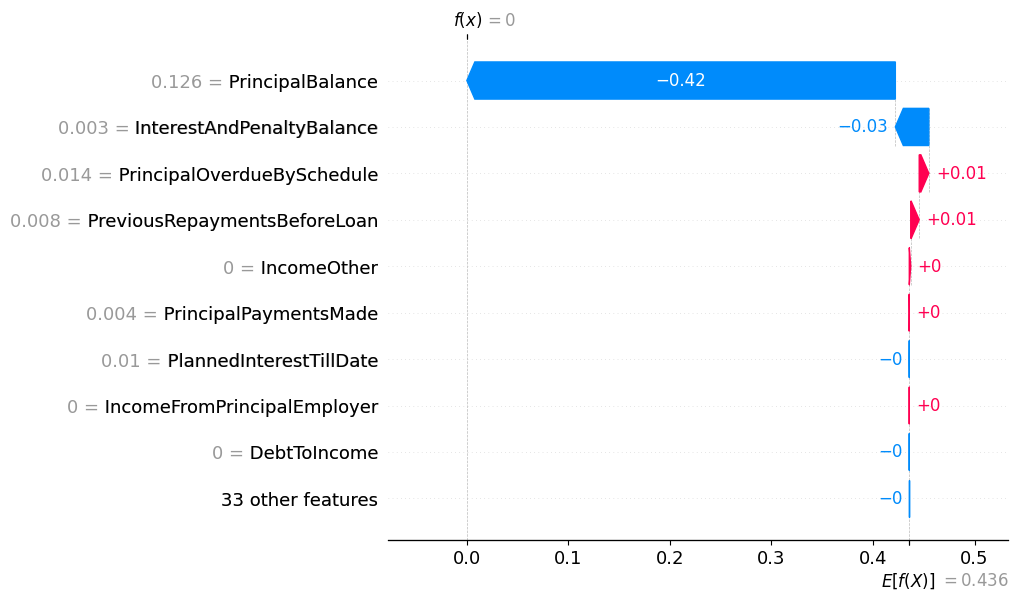

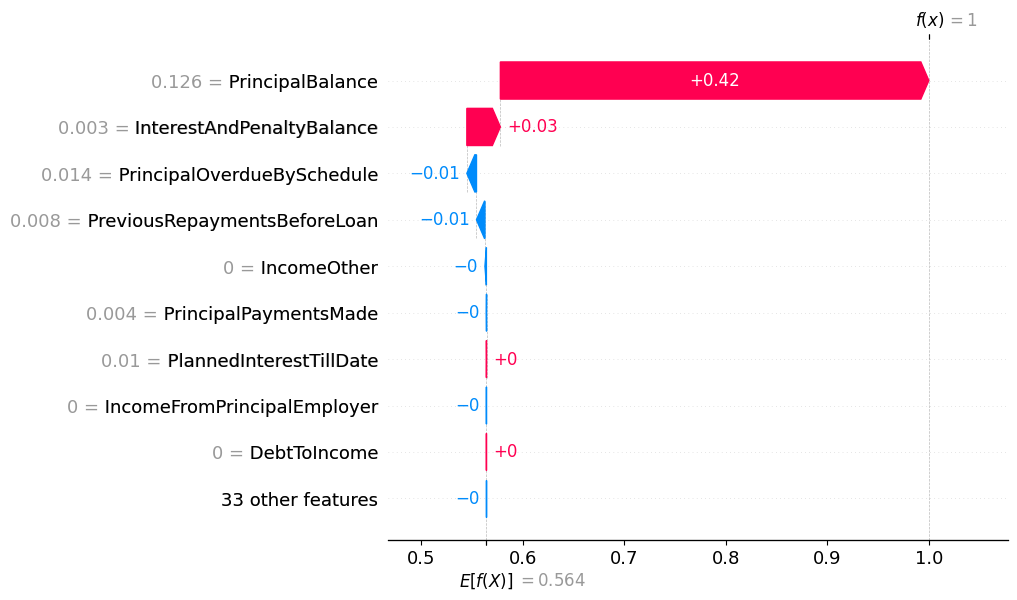

In [46]:
shap.plots.waterfall(shap_values_dt[2, : , 0])
shap.plots.waterfall(shap_values_dt[2, : , 1])

### Random Florest

In [30]:
explainer_rf = shap.TreeExplainer(rf_model_best, X_train)
shap_values_rf = explainer_dt(X_test)

np.shape(shap_values_rf.values)

(24293, 42, 2)

In [31]:
rf_model_best.predict_proba(X_test)[2]

c:\Users\tteve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([0., 1.])

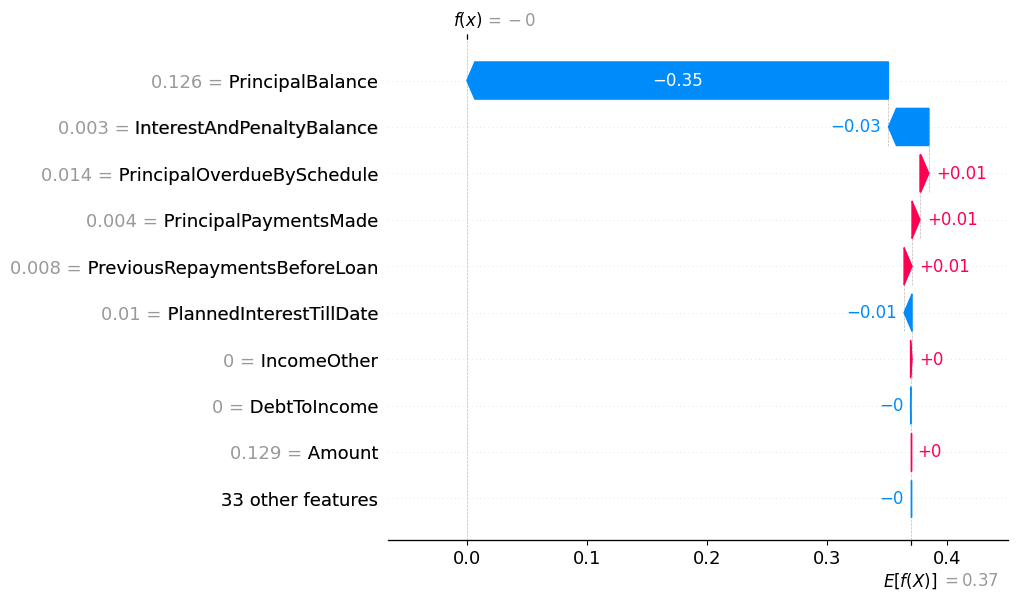

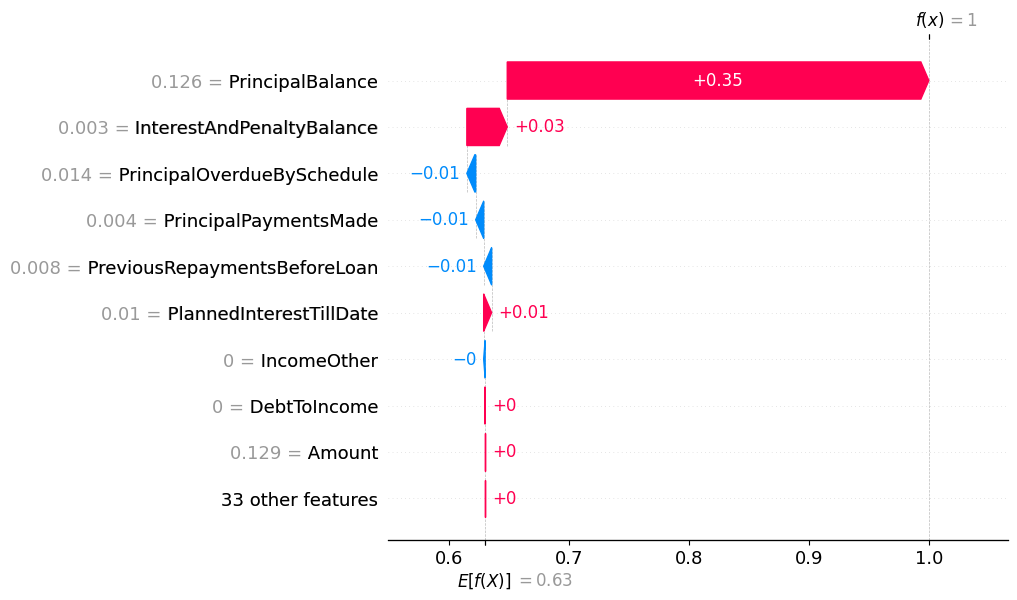

In [32]:
shap.plots.waterfall(shap_values_dt[2, : , 0])
shap.plots.waterfall(shap_values_dt[2, : , 1])

### Regressão Logísitca

In [33]:
explainer_lr = shap.LinearExplainer(lr_model_best, X_train)
shap_values_lr = explainer_lr(X_test)

In [34]:
lr_model_best.predict_proba(X_test)[2]


c:\Users\tteve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1.07916914e-08, 9.99999989e-01])

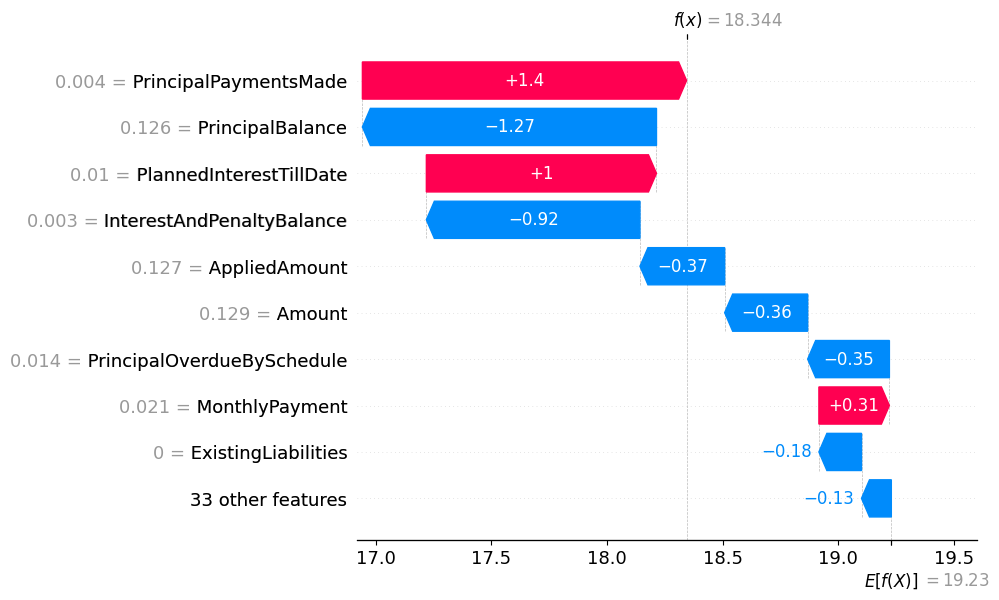

In [36]:
shap.plots.waterfall(shap_values_lr[2])

In [38]:
shap.initjs() 
shap.plots.force(shap_values_lr[0])

In [39]:
shap.plots.force(shap_values_lr[:10])

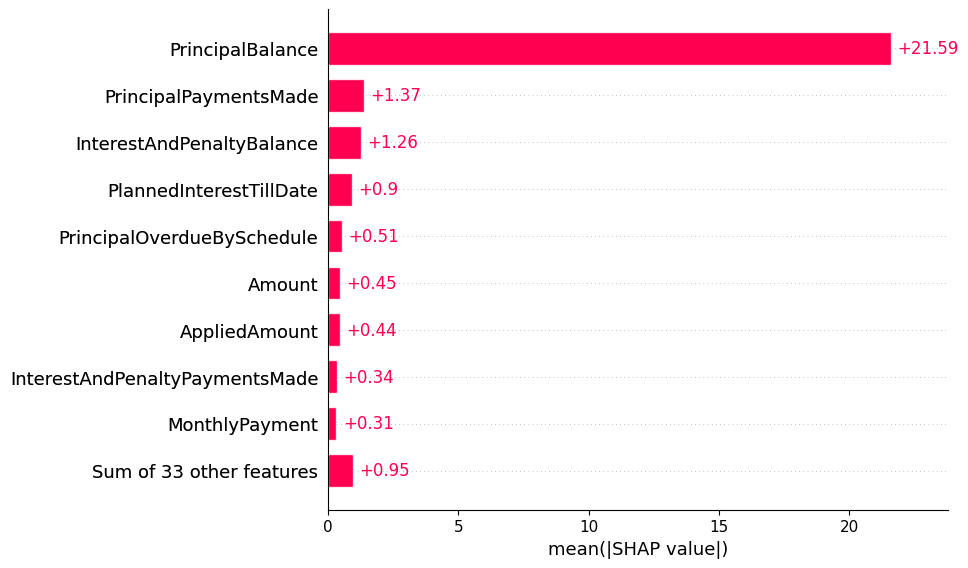

In [40]:

shap.plots.bar(shap_values_lr)

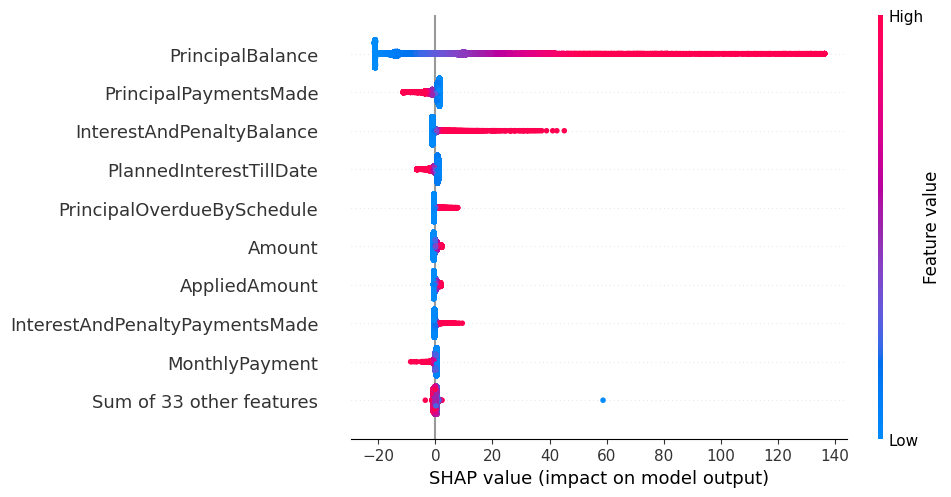

In [41]:
shap.plots.beeswarm(shap_values_lr)

### XGBoost

In [48]:
explainer = shap.TreeExplainer(xgb_model_best, X_train)
shap_values_xgb = explainer(X_test)

 99%|===================| 24054/24293 [01:02<00:00]        

In [49]:
np.shape(shap_values_xgb.values)

(24293, 42)

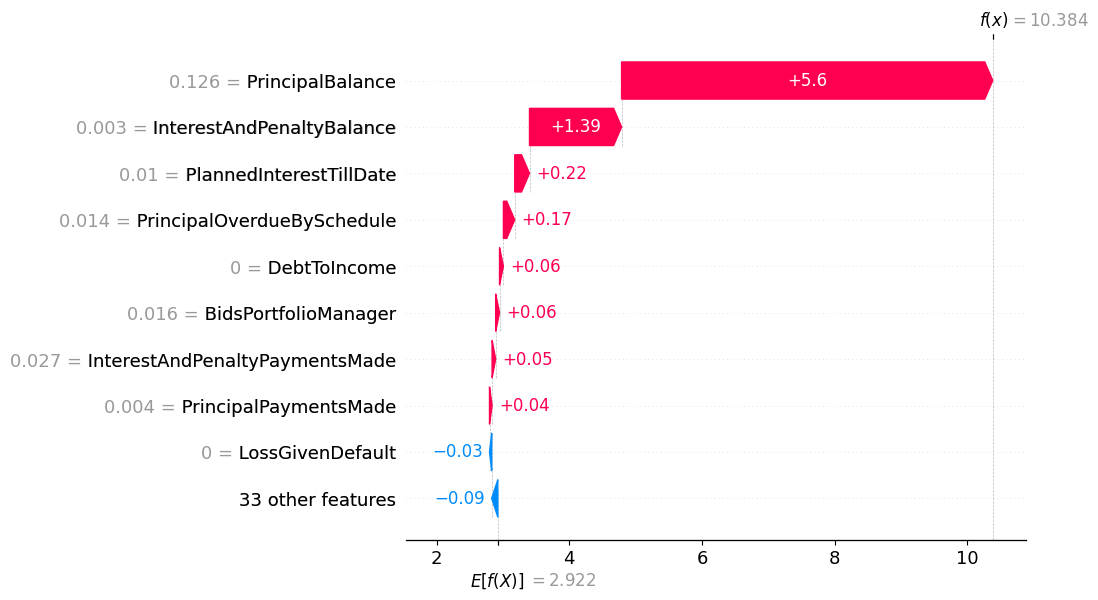

In [50]:
shap.plots.waterfall(shap_values_xgb[2])

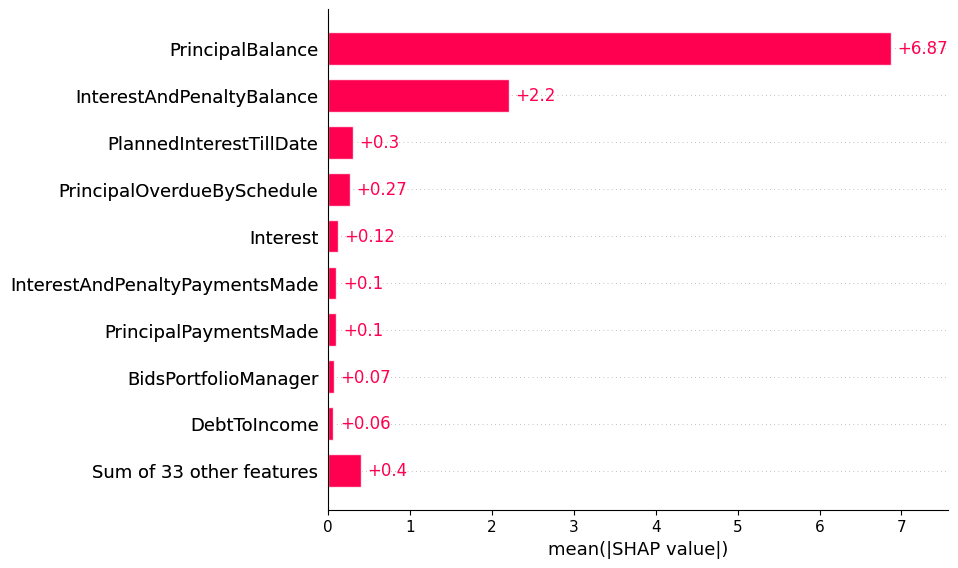

In [51]:
shap.plots.bar(shap_values_xgb)

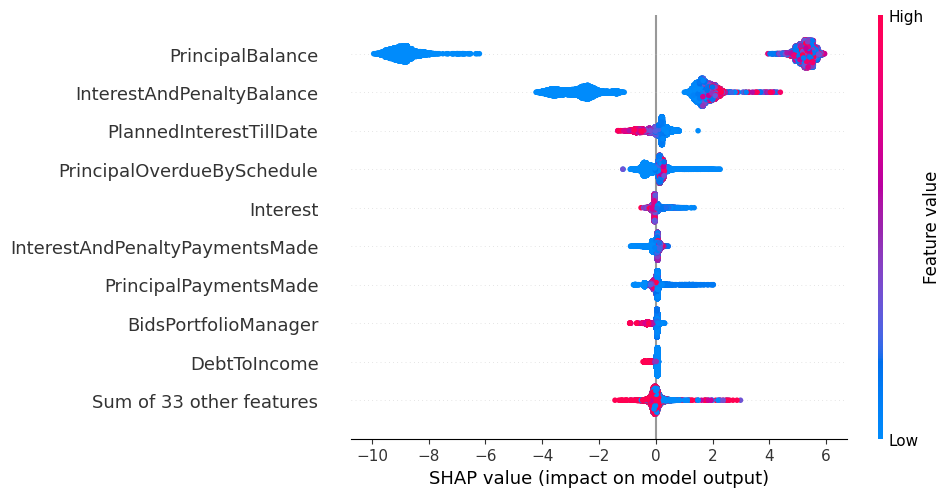

In [52]:
shap.plots.beeswarm(shap_values_xgb)